# Linear Regression for Forecasting Spreads

### Import Requirements

In [36]:
import pandas as pd
import numpy as np
import pandas_ta as ta
import matplotlib.pyplot as plt

### Data Preparation and Feature Engineering

In [151]:
df = pd.read_parquet('AAPL.parquet')

In [319]:
df.corr()

,OpenBidSize,OpenAskSize,FirstTradeSize,HighBidSize,HighAskSize,HighTradeSize,LowBidSize,LowAskSize,LowTradeSize,CloseBidSize,...,TradeAtCrossOrLocked,Volume,TotalTrades,FinraVolume,UptickVolume,DowntickVolume,RepeatUptickVolume,RepeatDowntickVolume,UnknownTickVolume,Hour
OpenBidSize,1.000000,0.099579,0.019228,0.355403,0.090995,0.003258,0.249407,0.080737,0.008905,0.276013,...,0.143712,0.075900,0.062124,0.083135,0.019114,0.026730,0.124061,0.151979,-0.000517,0.112351
OpenAskSize,0.099579,1.000000,0.001612,0.099555,0.316676,0.007010,0.065111,0.420353,0.002371,0.115890,...,0.101059,0.069552,0.047695,0.057619,0.020479,0.023570,0.142839,0.077501,-0.000258,0.060613
FirstTradeSize,0.019228,0.001612,1.000000,0.001770,0.000227,0.001139,0.012016,0.001440,0.095178,0.000041,...,-0.000752,0.042920,0.001807,0.026216,0.012219,0.051772,0.021210,0.043741,-0.000013,-0.004318
HighBidSize,0.355403,0.099555,0.001770,1.000000,0.037654,0.002061,0.097437,0.029258,0.000070,0.178967,...,0.044030,0.018945,-0.003118,0.008407,-0.002062,-0.005340,0.007443,0.072201,-0.000252,0.062864
HighAskSize,0.090995,0.316676,0.000227,0.037654,1.000000,0.002220,0.048411,0.072905,0.003011,0.094318,...,0.075575,0.066428,0.058835,0.071677,0.027951,0.032831,0.132757,0.072965,-0.000227,0.037422
HighTradeSize,0.003258,0.007010,0.001139,0.002061,0.002220,1.000000,0.004933,0.000207,0.000270,0.003410,...,0.012634,0.211838,0.019374,0.099785,0.392767,0.011137,0.014277,0.023098,-0.000020,-0.001793
LowBidSize,0.249407,0.065111,0.012016,0.097437,0.048411,0.004933,1.000000,0.028321,0.004641,0.370946,...,0.110129,0.109539,0.125920,0.112110,0.048973,0.064337,0.118495,0.188976,-0.000337,0.058229
LowAskSize,0.080737,0.420353,0.001440,0.029258,0.072905,0.000207,0.028321,1.000000,0.002066,0.079209,...,0.037594,0.036022,0.009053,0.019384,0.004233,0.005849,0.104300,0.015052,-0.000130,0.033426
LowTradeSize,0.008905,0.002371,0.095178,0.000070,0.003011,0.000270,0.004641,0.002066,1.000000,0.004081,...,0.007307,0.145127,0.010741,0.094059,0.005203,0.350972,0.013399,0.014477,-0.000023,0.000736
CloseBidSize,0.276013,0.115890,0.000041,0.178967,0.094318,0.003410,0.370946,0.079209,0.004081,1.000000,...,0.122895,0.077052,0.065708,0.078335,0.020579,0.027146,0.130654,0.138001,-0.000460,0.114540


In [152]:
datetime = df['BarDateTime'].dt.tz_localize(None)

In [153]:
hour = df['BarDateTime'].dt.hour
df['Hour'] = hour

In [154]:
del df['BarDateTime']
df['BarDateTime'] = datetime

In [58]:
df.columns

Index(['TradeDate', 'Ticker', 'SecId', 'OpenBarTimeOffset', 'OpenBidPrice',
       'OpenBidSize', 'OpenAskPrice', 'OpenAskSize', 'FirstTradeTimeOffset',
       'FirstTradePrice', 'FirstTradeSize', 'HighBidTimeOffset',
       'HighBidPrice', 'HighBidSize', 'HighAskTimeOffset', 'HighAskPrice',
       'HighAskSize', 'HighTradeTimeOffset', 'HighTradePrice', 'HighTradeSize',
       'LowBidTimeOffset', 'LowBidPrice', 'LowBidSize', 'LowAskTimeOffset',
       'LowAskPrice', 'LowAskSize', 'LowTradeTimeOffset', 'LowTradePrice',
       'LowTradeSize', 'CloseBarTimeOffset', 'CloseBidPrice', 'CloseBidSize',
       'CloseAskPrice', 'CloseAskSize', 'LastTradeTimeOffset',
       'LastTradePrice', 'LastTradeSize', 'MinSpread', 'MaxSpread',
       'CancelSize', 'VolumeWeightPrice', 'NBBOQuoteCount', 'TradeAtBid',
       'TradeAtBidMid', 'TradeAtMid', 'TradeAtMidAsk', 'TradeAtAsk',
       'TradeAtCrossOrLocked', 'Volume', 'TotalTrades', 'FinraVolume',
       'FinraVolumeWeightPrice', 'UptickVolume', 'Dow

In [155]:
df = df.drop(['TradeDate',
              'Ticker',
               'SecId',
               'OpenBarTimeOffset',
               'FirstTradeTimeOffset',
               'HighBidTimeOffset',
               'HighAskTimeOffset',
               'HighTradeTimeOffset',
               'LowTradeTimeOffset',
               'LowBidTimeOffset',
               'LowAskTimeOffset',
               'CloseBarTimeOffset',
               'LastTradeTimeOffset'],
               axis=1)

In [156]:
df.set_index(['BarDateTime'], inplace=True)

In [157]:
df.fillna(method='ffill')

,OpenBidPrice,OpenBidSize,OpenAskPrice,OpenAskSize,FirstTradePrice,FirstTradeSize,HighBidPrice,HighBidSize,HighAskPrice,HighAskSize,...,UptickVolume,DowntickVolume,RepeatUptickVolume,RepeatDowntickVolume,UnknownTickVolume,TradeToMidVolWeight,TradeToMidVolWeightRelative,TimeWeightBid,TimeWeightAsk,Hour
BarDateTime,,,,,,,,,,,,,,,,,,,,,
2017-12-01 04:00:00,0.00,0,0.00,0,171.6700,1,171.00,200,180.00,100,...,1,0,0,0,1,26.00000,0.27368,170.96105,171.95013,4
2017-12-01 04:01:00,170.95,200,171.95,500,171.5600,1,170.95,200,171.95,500,...,0,172,0,28,0,-28.47500,-0.44492,170.94881,171.71315,4
2017-12-01 04:02:00,170.95,100,171.59,300,171.0500,56,171.00,100,171.80,200,...,58,194,0,50,0,-19.49669,-0.25615,170.65635,171.59012,4
2017-12-01 04:03:00,170.90,400,171.59,300,170.9700,5,170.90,400,171.59,300,...,5,95,0,0,0,-41.39000,-0.40578,170.57965,171.59000,4
2017-12-01 04:04:00,170.57,1000,171.59,300,0.0000,0,170.60,200,171.59,300,...,0,0,0,0,0,0.00000,0.00000,170.59260,171.53966,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-06-21 19:55:00,135.63,1000,135.66,100,135.6500,20,135.64,100,135.66,100,...,31,350,6,54,0,-0.29688,-0.09896,135.63071,135.66000,19
2022-06-21 19:56:00,135.64,100,135.66,100,135.6500,1,135.64,100,135.70,100,...,786,39,146,1,0,0.67275,0.16819,135.64000,135.69786,19
2022-06-21 19:57:00,135.64,500,135.70,100,135.6900,10,135.67,1000,135.72,200,...,25,129,118,1339,0,-1.67012,-0.34628,135.66263,135.70435,19


In [158]:
df = df[(df.Hour > 8) & (df.Hour < 16)]

In [159]:
is_nan = df.isna().any()
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(is_nan)


OpenBidPrice                   False
OpenBidSize                    False
OpenAskPrice                   False
OpenAskSize                    False
FirstTradePrice                False
FirstTradeSize                 False
HighBidPrice                   False
HighBidSize                    False
HighAskPrice                   False
HighAskSize                    False
HighTradePrice                 False
HighTradeSize                  False
LowBidPrice                    False
LowBidSize                     False
LowAskPrice                    False
LowAskSize                     False
LowTradePrice                  False
LowTradeSize                   False
CloseBidPrice                  False
CloseBidSize                   False
CloseAskPrice                  False
CloseAskSize                   False
LastTradePrice                 False
LastTradeSize                  False
MinSpread                      False
MaxSpread                      False
CancelSize                     False
V

### Calculate Dataset Features

##### Spread

In [160]:
df['Spread'] = df.apply(lambda x: x['CloseAskPrice'] - x['CloseBidPrice'], axis=1)

##### Returns - Opening Minute Bar Trade to Closing Minute Bar Trade

In [161]:
import decimal

df['Returns'] = df.apply(lambda x:
     (x['LastTradePrice'] - x['FirstTradePrice'])/x['FirstTradePrice'] if x['FirstTradePrice'] != 0
     else decimal.Decimal('NaN'), axis=1)

##### Lagged Spread

In [162]:
df['Spread_Lag_1'] = df['Spread'].shift(+1)
df['Spread_Lag_2'] = df['Spread'].shift(+2)
df['Spread_Lag_3'] = df['Spread'].shift(+3)

##### Lagged Returns

In [228]:
df['Returns_Lag_1'] = df['Returns'].shift(+1)
df['Returns_Lag_2'] = df['Returns'].shift(+2)
df['Returns_Lag_3'] = df['Returns'].shift(+3)

In [224]:
is_nan = df.isna().any()
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(is_nan)

OpenBidPrice                   False
OpenBidSize                    False
OpenAskPrice                   False
OpenAskSize                    False
FirstTradePrice                False
FirstTradeSize                 False
HighBidPrice                   False
HighBidSize                    False
HighAskPrice                   False
HighAskSize                    False
HighTradePrice                 False
HighTradeSize                  False
LowBidPrice                    False
LowBidSize                     False
LowAskPrice                    False
LowAskSize                     False
LowTradePrice                  False
LowTradeSize                   False
CloseBidPrice                  False
CloseBidSize                   False
CloseAskPrice                  False
CloseAskSize                   False
LastTradePrice                 False
LastTradeSize                  False
MinSpread                      False
MaxSpread                      False
CancelSize                     False
V

In [229]:
df = df[df['Spread_Lag_3'].notna()]
df = df[df['Returns_Lag_3'].notna()]
df = df[df['Returns'].notna()]

In [230]:
is_nan = df.isna().any()
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(is_nan)

OpenBidPrice                   False
OpenBidSize                    False
OpenAskPrice                   False
OpenAskSize                    False
FirstTradePrice                False
FirstTradeSize                 False
HighBidPrice                   False
HighBidSize                    False
HighAskPrice                   False
HighAskSize                    False
HighTradePrice                 False
HighTradeSize                  False
LowBidPrice                    False
LowBidSize                     False
LowAskPrice                    False
LowAskSize                     False
LowTradePrice                  False
LowTradeSize                   False
CloseBidPrice                  False
CloseBidSize                   False
CloseAskPrice                  False
CloseAskSize                   False
LastTradePrice                 False
LastTradeSize                  False
MinSpread                      False
MaxSpread                      False
CancelSize                     False
V

### Linear Regression Using Returns

In [295]:
from sklearn.linear_model import LinearRegression
lin_model=LinearRegression()

In [ ]:
x,y=df['Returns'],df['Spread']
x,y=np.array(x),np.array(y)
x,y=x.reshape(-1,1),y.reshape(-1,1)
print(x)

[[Decimal('-0.00005866823115283074215312408331')]
 [Decimal('-0.0001759943681802182330165434706')]
 [Decimal('-0.0002933583665806148791363529688')]
 ...
 [Decimal('-0.0006260357208617197569508377831')]
 [Decimal('-0.0002210921954455007738226840593')]
 [Decimal('0.001548101732399557685219314412')]]


In [ ]:
X_train,X_test,y_train,y_test=x[:924245],x[924245:],y[:924245],y[924245:]


In [ ]:
lin_model.fit(X_train,y_train)

LinearRegression()

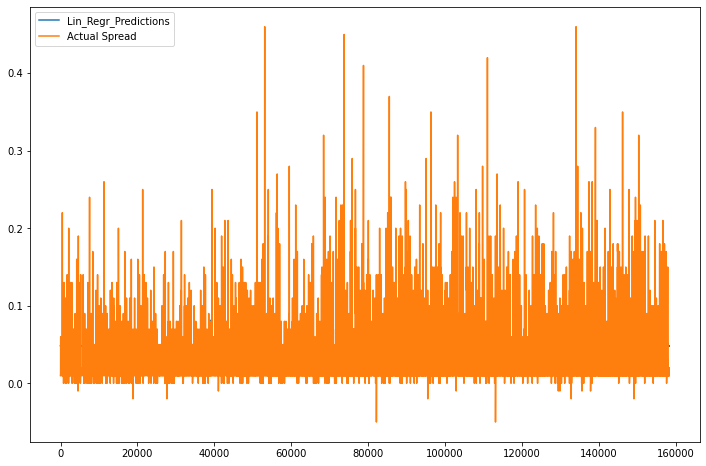

In [ ]:
pred=lin_model.predict(X_test)
plt.rcParams["figure.figsize"] = (12,8)
plt.plot(pred,label='Lin_Regr_Predictions')
plt.plot(y_test,label='Actual Spread')
plt.legend(loc="upper left")
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report
from math import sqrt
# # sklearn.metrics.r2_score(y_true, y_pred
# summary_report = classification_report(y_test, pred)
# print(summary_report)
rmse_lin_regr = sqrt(mean_squared_error(y_test, pred))
r_sq = lin_model.score(X_test, y_test)
slope = lin_model.coef_
intercept = lin_model.intercept_
print(f'RMSE = {rmse_lin_regr}')
print(f'R-sq = {r_sq}')
print(f'Slope = {slope}')
print(f'Intercept = {intercept}')

RMSE = 0.036748357269469414
R-sq = -4.548995313205185
Slope = [[-0.20394823]]
Intercept = [0.04818482]


### Random Forest Using Returns

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf_model=RandomForestRegressor(n_estimators=100,max_features=3, random_state=1)

In [ ]:
x,y=df['Returns'],df['Spread']
x,y=np.array(x),np.array(y)
x,y=x.reshape(-1,1),y.reshape(-1,1)
print(x)

[[Decimal('-0.00005866823115283074215312408331')]
 [Decimal('-0.0001759943681802182330165434706')]
 [Decimal('-0.0002933583665806148791363529688')]
 ...
 [Decimal('-0.0006260357208617197569508377831')]
 [Decimal('-0.0002210921954455007738226840593')]
 [Decimal('0.001548101732399557685219314412')]]


In [ ]:
X_train,X_test,y_train,y_test=x[:924245],x[924245:],y[:924245],y[924245:]

In [ ]:
rf_model.fit(X_train,y_train)

C:\Users\angel\AppData\Local\Temp/ipykernel_28012/764246711.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(X_train,y_train)


RandomForestRegressor(max_features=3, random_state=1)

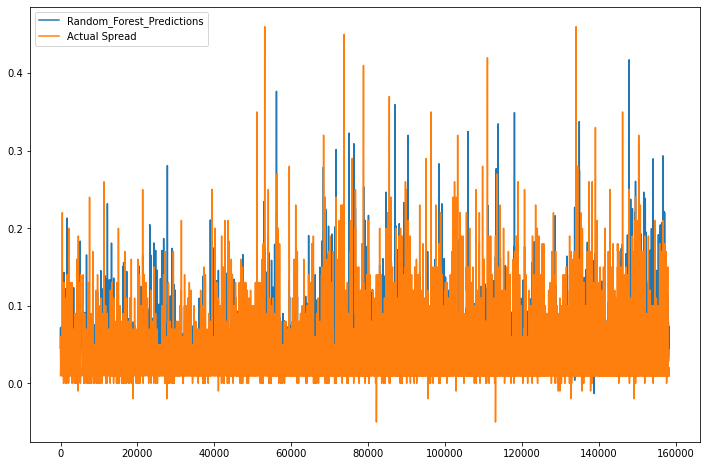

In [ ]:
pred=rf_model.predict(X_test)
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,8)
plt.plot(pred,label='Random_Forest_Predictions')
plt.plot(y_test,label='Actual Spread')
plt.legend(loc="upper left")
plt.show()

In [ ]:
rmse_rf = sqrt(mean_squared_error(y_test, pred))
r_sq = rf_model.score(X_test, y_test)
print(f'RMSE = {rmse_lin_regr}')
print(f'R-sq = {r_sq}')

RMSE = 0.036748357269469414
R-sq = -4.667654932079089


### Linear Regression Using Lagged Spread

In [399]:
x1,x2,x3,y=df['Spread_Lag_1'],df['Spread_Lag_2'],df['Spread_Lag_3'],df['Spread']
x1,x2,x3,y=np.array(x1),np.array(x2),np.array(x3),np.array(y)
x1,x2,x3,y=x1.reshape(-1,1),x2.reshape(-1,1),x3.reshape(-1,1),y.reshape(-1,1)
final_x=np.concatenate((x1,x2,x3),axis=1)
print(final_x)

[[Decimal('0.04') Decimal('0.04') Decimal('0.04')]
 [Decimal('0.04') Decimal('0.04') Decimal('0.04')]
 [Decimal('0.08') Decimal('0.04') Decimal('0.04')]
 ...
 [Decimal('0.01') Decimal('0.02') Decimal('0.01')]
 [Decimal('0.01') Decimal('0.01') Decimal('0.02')]
 [Decimal('0.01') Decimal('0.01') Decimal('0.01')]]


In [400]:
# len -> 1087348
X_train,X_test,y_train,y_test=final_x[:924245],final_x[924245:],y[:924245],y[924245:]


In [401]:
lin_model.fit(X_train,y_train)

LinearRegression()

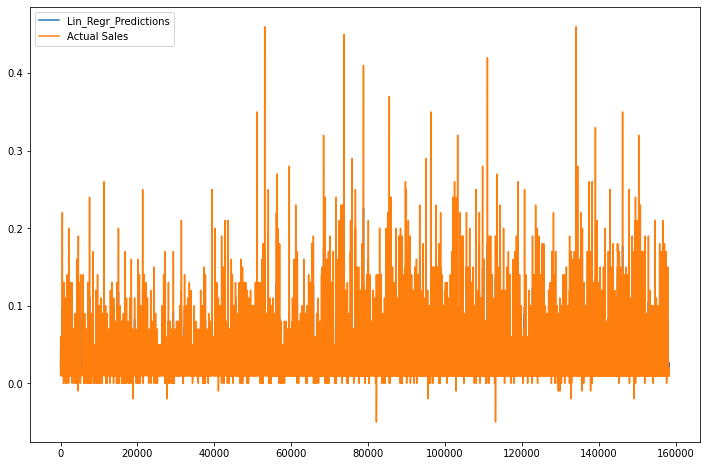

In [402]:
pred=lin_model.predict(X_test)
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,8)
plt.plot(pred,label='Lin_Regr_Predictions')
plt.plot(y_test,label='Actual Sales')
plt.legend(loc="upper left")
plt.show()

In [403]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report
from math import sqrt
# # sklearn.metrics.r2_score(y_true, y_pred
# summary_report = classification_report(y_test, pred)
# print(summary_report)
rmse_lin_regr = sqrt(mean_squared_error(y_test, pred))
r_sq = lin_model.score(X_test, y_test)
slope = lin_model.coef_
intercept = lin_model.intercept_
print(f'RMSE = {rmse_lin_regr}')
print(f'R-sq = {r_sq}')
print(f'Slope = {slope}')
print(f'Intercept = {intercept}')

RMSE = 0.015133362448162189
R-sq = 0.058957223396668756
Slope = [[0.25335172 0.22927654 0.22054737]]
Intercept = [0.01430355]


### Random Forest Model Using Lagged Spread

In [ ]:
x1,x2,x3,x4,y=df['Spread_Lag_1'],df['Spread_Lag_2'],df['Spread_Lag_3'],df['Returns'],df['Spread']
x1,x2,x3,x4,y=np.array(x1),np.array(x2),np.array(x3),np.array(x4),np.array(y)
x1,x2,x3,x4,y=x1.reshape(-1,1),x2.reshape(-1,1),x3.reshape(-1,1),x4.reshape(-1,1),y.reshape(-1,1)
final_x=np.concatenate((x1,x2,x3,x4),axis=1)
print(final_x)

[[Decimal('0.04') Decimal('0.04') Decimal('0.04')
  Decimal('-0.00005866823115283074215312408331')]
 [Decimal('0.04') Decimal('0.04') Decimal('0.04')
  Decimal('-0.0001759943681802182330165434706')]
 [Decimal('0.08') Decimal('0.04') Decimal('0.04')
  Decimal('-0.0002933583665806148791363529688')]
 ...
 [Decimal('0.01') Decimal('0.02') Decimal('0.01')
  Decimal('-0.0006260357208617197569508377831')]
 [Decimal('0.01') Decimal('0.01') Decimal('0.02')
  Decimal('-0.0002210921954455007738226840593')]
 [Decimal('0.01') Decimal('0.01') Decimal('0.01')
  Decimal('0.001548101732399557685219314412')]]


In [ ]:
X_train,X_test,y_train,y_test=final_x[:924245],final_x[924245:],y[:924245],y[924245:]

In [ ]:
rf_model.fit(X_train,y_train)

C:\Users\angel\AppData\Local\Temp/ipykernel_28012/764246711.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(X_train,y_train)


RandomForestRegressor(max_features=3, random_state=1)

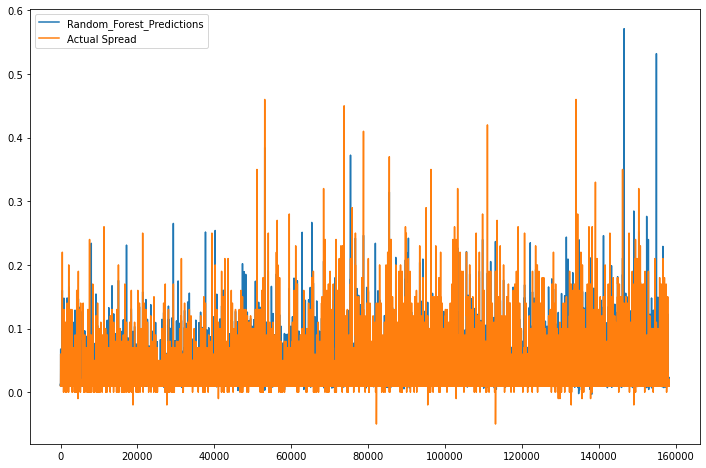

In [ ]:
pred=rf_model.predict(X_test)
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,8)
plt.plot(pred,label='Random_Forest_Predictions')
plt.plot(y_test,label='Actual Spread')
plt.legend(loc="upper left")
plt.show()

In [ ]:
rmse_rf = sqrt(mean_squared_error(y_test, pred))
r_sq = rf_model.score(X_test, y_test)
print(f'RMSE = {rmse_lin_regr}')
print(f'R-sq = {r_sq}')

RMSE = 0.03713488242729044
R-sq = 0.23790195512294943


### Linear Regression Using Variables with Highest Correlation

In [411]:
x1,x2,x3,x4,x5,x6,x7,y=df['Returns_Lag_1'],df['Returns'],df['MinSpread'],df['MaxSpread'],df['FinraVolume'],df['NBBOQuoteCount'],df['VolumeWeightPrice'],df['Spread']
x1,x2,x3,x4,x5,x6,x7,y=np.array(x1),np.array(x2),np.array(x3),np.array(x4),np.array(x5),np.array(x6),np.array(x7),np.array(y)
x1,x2,x3,x4,x5,x6,x7,y=x1.reshape(-1,1),x2.reshape(-1,1),x3.reshape(-1,1),x4.reshape(-1,1),x5.reshape(-1,1),x6.reshape(-1,1),x7.reshape(-1,1),y.reshape(-1,1)
final_x=np.concatenate((x1,x2,x3,x4,x5,x6,x7),axis=1)
print(final_x)

[[Decimal('0') Decimal('-0.00005866823115283074215312408331')
  Decimal('0.02') ... 9 40 Decimal('170.45199')]
 [Decimal('-0.00005866823115283074215312408331')
  Decimal('-0.0001759943681802182330165434706') Decimal('0.04') ... 620
  42 Decimal('170.43423')]
 [Decimal('-0.0001759943681802182330165434706')
  Decimal('-0.0002933583665806148791363529688') Decimal('0.01') ... 23 48
  Decimal('170.43676')]
 ...
 [Decimal('-0.001250505719224686454080694398')
  Decimal('-0.0006260357208617197569508377831') Decimal('0.01') ...
  149346 12720 Decimal('135.70341')]
 [Decimal('-0.0006260357208617197569508377831')
  Decimal('-0.0002210921954455007738226840593') Decimal('0.01') ...
  146254 10764 Decimal('135.64863')]
 [Decimal('-0.0002210921954455007738226840593')
  Decimal('0.001548101732399557685219314412') Decimal('0.01') ... 215225
  20748 Decimal('135.78901')]]


In [412]:
X_train,X_test,y_train,y_test=final_x[:924245],final_x[924245:],y[:924245],y[924245:]

In [413]:
regr_model = lin_model.fit(X_train,y_train)

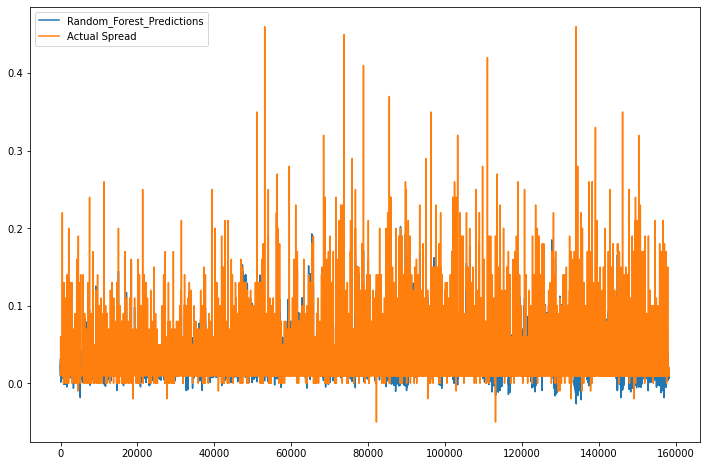

In [414]:
pred=regr_model.predict(X_test)
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,8)
plt.plot(pred,label='Random_Forest_Predictions')
plt.plot(y_test,label='Actual Spread')
plt.legend(loc="upper left")
plt.show()

In [415]:
rmse_lin_regr = sqrt(mean_squared_error(y_test, pred))
r_sq = lin_model.score(X_test, y_test)
slope = lin_model.coef_
intercept = lin_model.intercept_
print(f'RMSE = {rmse_lin_regr}')
print(f'R-sq = {r_sq}')
print(f'Slope = {slope}')
print(f'Intercept = {intercept}')

RMSE = 0.01163923481229727
R-sq = 0.44334340630408986
Slope = [[-6.15524333e-02 -1.68166395e-01  9.26424028e-01  1.01828262e-01
   3.87451334e-08 -9.25551109e-07  1.77541422e-04]]
Intercept = [-0.01965426]


### Random Forest Using Highest Correlated Variables

In [ ]:
x1,x2,x3,x4,x5,x6,y=df['Returns_Lag_1'],df['Returns'],df['MinSpread'],df['MaxSpread'],df['FinraVolume'],df['NBBOQuoteCount'],df['Spread']
x1,x2,x3,x4,x5,x6,y=np.array(x1),np.array(x2),np.array(x3),np.array(x4),np.array(x5),np.array(x6),np.array(y)
x1,x2,x3,x4,x5,x6,y=x1.reshape(-1,1),x2.reshape(-1,1),x3.reshape(-1,1),x4.reshape(-1,1),x5.reshape(-1,1),x6.reshape(-1,1),y.reshape(-1,1)
final_x=np.concatenate((x1,x2,x3,x4,x5,x6),axis=1)
print(final_x)

[[Decimal('0') Decimal('-0.00005866823115283074215312408331')
  Decimal('0.02') Decimal('0.10') 9 40]
 [Decimal('-0.00005866823115283074215312408331')
  Decimal('-0.0001759943681802182330165434706') Decimal('0.04')
  Decimal('0.10') 620 42]
 [Decimal('-0.0001759943681802182330165434706')
  Decimal('-0.0002933583665806148791363529688') Decimal('0.01')
  Decimal('0.09') 23 48]
 ...
 [Decimal('-0.001250505719224686454080694398')
  Decimal('-0.0006260357208617197569508377831') Decimal('0.01')
  Decimal('0.02') 149346 12720]
 [Decimal('-0.0006260357208617197569508377831')
  Decimal('-0.0002210921954455007738226840593') Decimal('0.01')
  Decimal('0.02') 146254 10764]
 [Decimal('-0.0002210921954455007738226840593')
  Decimal('0.001548101732399557685219314412') Decimal('0.01')
  Decimal('0.04') 215225 20748]]


In [ ]:
X_train,X_test,y_train,y_test=final_x[:924245],final_x[924245:],y[:924245],y[924245:]

In [ ]:
rf_model.fit(X_train,y_train)

C:\Users\angel\AppData\Local\Temp/ipykernel_28012/764246711.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(X_train,y_train)


RandomForestRegressor(max_features=3, random_state=1)

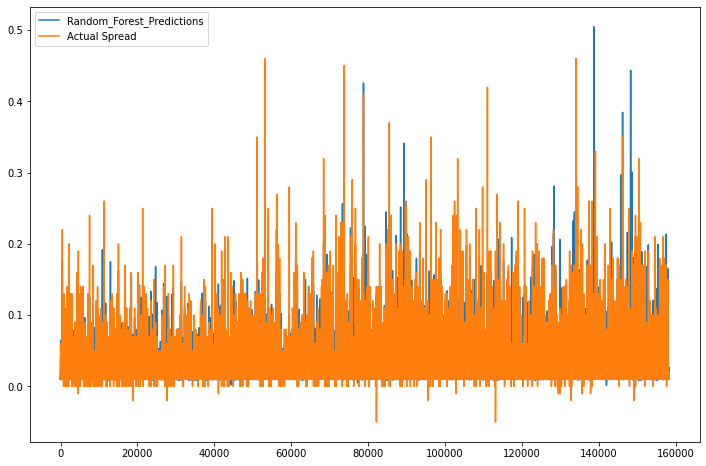

In [ ]:
pred=rf_model.predict(X_test)
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,8)
plt.plot(pred,label='Random_Forest_Predictions')
plt.plot(y_test,label='Actual Spread')
plt.legend(loc="upper left")
plt.show()

In [ ]:
rmse_rf = sqrt(mean_squared_error(y_test, pred))
r_sq = rf_model.score(X_test, y_test)
print(f'RMSE = {rmse_lin_regr}')
print(f'R-sq = {r_sq}')

RMSE = 0.036748357269469414
R-sq = 0.6207805744579973
